In [1]:
import pandas as pd

import numpy as np

import os
import cv2

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
import math
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [3]:
gpus = tf.config.experimental.list_physical_devices(device_type="GPU")
tf.config.experimental.set_visible_devices(devices=gpus[0], device_type="GPU")
tf.config.experimental.set_memory_growth(device=gpus[0], enable=True)

In [4]:
img_dir = "D:/study/corona/covid-chestxray-dataset-master/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"

In [5]:
img_dir2 = "D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/"

In [6]:
tr_csv = pd.read_csv("D:/study/corona/covid-chestxray-dataset-master/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")

In [7]:
tes_csv = pd.read_csv("D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/metadata2.csv")

In [8]:
tr_csv.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [9]:
tes_csv.head()

,id,filename,patientid,offset,sex,age,finding,survival,temperature,leukocyte count,...,pO2 saturation,view,modality,date,doi,location,url,license,clinical notes,other notes
0,1,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,...,NaN,PA,X-ray,"January 22, 2020",10.1056/nejmc2001272,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN
1,2,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,...,NaN,PA,X-ray,"January 25, 2020",10.1056/nejmc2001272,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN
2,3,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,...,NaN,PA,X-ray,"January 27, 2020",10.1056/nejmc2001272,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN
3,4,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,...,NaN,PA,X-ray,"January 28, 2020",10.1056/nejmc2001272,"Cho Ray Hospital, Ho Chi Minh City, Vietnam",https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN
4,5,nejmc2001573_f1a.jpeg,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,...,NaN,PA,X-ray,"January 25, 2020",10.1056/NEJMc2001573,"Changhua Christian Hospital, Changhua City, Ta...",https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN


In [10]:
tr_csv['Label'].unique()

array(['Normal', 'Pnemonia'], dtype=object)

In [11]:
i=0
normal = []
for idex,row in tr_csv.iterrows():
    if row['Label']=='Normal' and i<500:
        i+=1  
        data_path = os.path.join(img_dir,row['X_ray_image_name'])
        img = cv2.imread(data_path)
        if np.any(img != None):
            img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)  
            normal.append(img)

In [12]:
len(normal)

500

In [13]:
covid = []
for idex,row in tes_csv.iterrows():
    if row['finding']=='COVID-19': 
        data_path = os.path.join(img_dir2,row['filename'])
        print(data_path)
        img = cv2.imread(data_path)
        img = cv2.resize(img,(256,256))  
        covid.append(img)

D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/nejmc2001573_f1a.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/nejmc2001573_f1b.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/lancet-case2a.jpg
D:/study/corona/covid-chestxray-dataset-master/covid-chestx

D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/5931B64A-7B97-485D-BE60-3F1EA76BC4F0.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/C6EA0BE5-B01E-4113-B194-18D956675E25.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/41591_2020_819_Fig1_HTML.webp-day5.png
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/41591_2020_819_Fig1_HTML.webp-day10.png
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/5e6dd879fde9502400e58b2f.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/covid-19-pneumonia-19.jpg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/kjr-21-e25-g001-l-a.jpg
D:/study/corona/covid-chestxray-data

In [14]:
covid[0].shape

(256, 256, 3)

In [15]:
non_covid = []
for idex,row in tes_csv.iterrows():
    if row['finding']!='COVID-19': 
        data_path = os.path.join(img_dir2,row['filename'])
        print(data_path)
        img = cv2.imread(data_path)
        img = cv2.resize(img,(256,256))  
        non_covid.append(img)

D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/ARDSSevere.png
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master/images/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
D:/study/corona/covid-chestxray-dataset-master/covid-chestxray-dataset-master

In [16]:
len(non_covid)

43

In [17]:
data_generator = ImageDataGenerator(rotation_range = 10,width_shift_range = 0.1,height_shift_range = 0.1,shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')

In [18]:
noncov_aug = []
for j in range(len(non_covid)):
    datat_1 = img_to_array(non_covid[j])
    datat_1 = datat_1.reshape((1,)+datat_1.shape)
    i = 0
    for batch in data_generator.flow(datat_1):
        noncov_aug.append(np.array(array_to_img(batch[0])))
        i+=1
        if i == 2:
            break

In [19]:
noncov_aug[0].shape

(256, 256, 3)

In [20]:
trainn = normal + covid + noncov_aug

In [21]:
label_n = [0 for i in range(len(normal))]
label_c = [1 for i in range(len(covid))]
label_nc = [2 for i in range(len(noncov_aug))]

In [22]:
labels = label_n+label_c+label_nc

In [23]:
labels=np.array(labels)

In [24]:
labels.shape


(710,)

In [25]:
from keras.utils import to_categorical
la=to_categorical(labels)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(trainn, la, test_size=0.20, random_state=42)

In [27]:
X_train[0].shape

(256, 256, 3)

## model 1

In [160]:
from keras.applications import resnet50
from keras.models import Model
import keras

res = resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3),pooling=max)

res.trainable = False
for layer in res.layers:
    layer.trainable = False
    
flat=keras.layers.Flatten()(res.output)
#dense1=keras.layers.Dense(256,activation='linear')(flat)
output=keras.layers.Dense(3,activation='softmax')(flat)

In [161]:
model=Model(inputs=res.input,outputs=output)

In [162]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [163]:
#from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model_2 = resnet50.ResNet50(include_top=False,weights='imagenet',input_shape = (256,256,3))

model_2.summary()


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [164]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [165]:
with tf.device('/device:GPU:0'):    
    fit=model.fit(np.array(X_train),np.array(y_train),epochs=5,verbose=1,validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
18/18 [==============================] - 31s 1s/step - loss: 4.5567 - accuracy: 0.7403 - val_loss: 0.7120 - val_accuracy: 0.9577
Epoch 2/5
18/18 [==============================] - 12s 647ms/step - loss: 0.1330 - accuracy: 0.9739 - val_loss: 0.4222 - val_accuracy: 0.9789
Epoch 3/5
18/18 [==============================] - 12s 647ms/step - loss: 0.0043 - accuracy: 0.9973 - val_loss: 0.1629 - val_accuracy: 0.9930
Epoch 4/5
18/18 [==============================] - 11s 645ms/step - loss: 0.0044 - accuracy: 0.9980 - val_loss: 0.0984 - val_accuracy: 0.9930
Epoch 5/5
18/18 [==============================] - 11s 646ms/step - loss: 0.0157 - accuracy: 0.9986 - val_loss: 0.0888 - val_accuracy: 0.9930


In [166]:
y_pred=model.predict(np.array(X_test))

In [168]:
yy = np.argmax(y_pred, axis=1)
yt = np.argmax(y_test, axis=1)

In [169]:
from sklearn.metrics import accuracy_score
accuracy_score(yt, yy)

0.9929577464788732

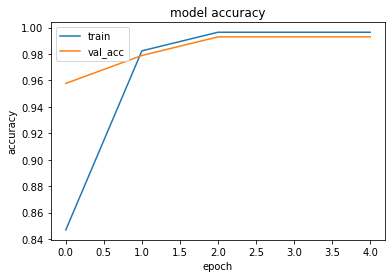

In [181]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit.history['accuracy'])
#plt.plot(fit.history['accuracy'])
plt.plot(fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train',"val_acc"], loc='upper left')
plt.show()

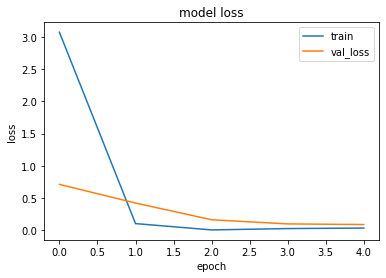

In [182]:
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train',"val_loss"], loc='upper right')
plt.show()

## Model 2

In [185]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(256,256,3),pooling=max)

vgg.trainable = False
for layer in vgg.layers:
    layer.trainable = False
    
flat=keras.layers.Flatten()(vgg.output)
#dense1=keras.layers.Dense(256,activation='linear')(flat)
output=keras.layers.Dense(3,activation='softmax')(flat)

In [186]:
model_3=Model(inputs=vgg.input,outputs=output)

In [187]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [188]:
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14665862744458339190,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4815519744
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8537854480832789771
 physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [189]:
with tf.device('/device:GPU:0'):
    fit_3=model_3.fit(np.array(X_train),np.array(y_train),epochs=5,verbose=1,validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/5
18/18 [==============================] - 19s 669ms/step - loss: 7.0257 - accuracy: 0.7586 - val_loss: 0.0682 - val_accuracy: 0.9930
Epoch 2/5
18/18 [==============================] - 3s 173ms/step - loss: 0.2882 - accuracy: 0.9791 - val_loss: 0.2932 - val_accuracy: 0.9789
Epoch 3/5
18/18 [==============================] - 3s 174ms/step - loss: 6.6192e-04 - accuracy: 0.9998 - val_loss: 0.0490 - val_accuracy: 0.9930
Epoch 4/5
18/18 [==============================] - 3s 174ms/step - loss: 0.0182 - accuracy: 0.9976 - val_loss: 0.1007 - val_accuracy: 0.9930
Epoch 5/5
18/18 [==============================] - 3s 174ms/step - loss: 2.1668e-05 - accuracy: 1.0000 - val_loss: 0.1719 - val_accuracy: 0.9930


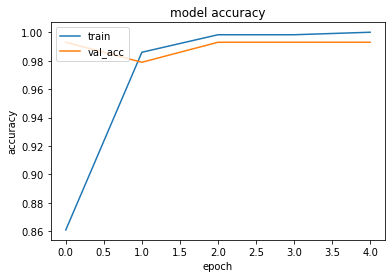

In [190]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit_3.history['accuracy'])
plt.plot(fit_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train',"val_acc"], loc='upper left')
plt.show()

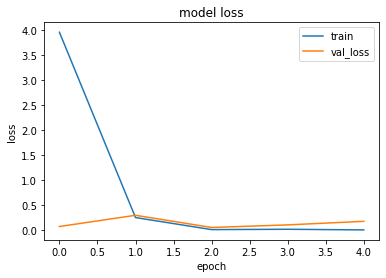

In [192]:
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit_3.history['loss'])
plt.plot(fit_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train',"val_loss"], loc='upper right')
plt.show()

## Model_3

In [80]:
import numpy
import keras
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.models import Model

In [133]:
model_9 = keras.models.Sequential()
#keras.layers.BatchNormalization()
model_9.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))
model_9.add(keras.layers.BatchNormalization())
model_9.add(keras.layers.AveragePooling2D(2,2))

    
model_9.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model_9.add(keras.layers.BatchNormalization())
model_9.add(keras.layers.AveragePooling2D(2,2))
    
model_9.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model_9.add(keras.layers.BatchNormalization())
model_9.add(keras.layers.AveragePooling2D(2,2))
model_4.add(keras.layers.Dropout(0.2))
#model_9.add(keras.layers.Conv2D(256,(3,3),activation = 'relu'))
#model_9.add(keras.layers.BatchNormalization())
#model_9.add(keras.layers.AveragePooling2D(2,2))
#model_4.add(keras.layers.Dropout(0.2))
model_9.add(keras.layers.Flatten())
model_9.add(keras.layers.Dense(128,activation = 'relu'))
model_9.add(keras.layers.Dense(64,activation = 'relu'))
model_9.add(keras.layers.Dense(32,activation = 'relu'))
model_9.add(keras.layers.Dense(3,activation = 'softmax'))
# compile model
model_9.summary()
#model_9.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_65 (Batc (None, 254, 254, 32)      128       
_________________________________________________________________
average_pooling2d_64 (Averag (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_66 (Batc (None, 125, 125, 64)      256       
_________________________________________________________________
average_pooling2d_65 (Averag (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 60, 60, 128)     

In [134]:
model_9.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

In [135]:
with tf.device('/device:GPU:0'):
    fit_9=model_9.fit(np.array(X_train),np.array(y_train),epochs=50,verbose=1,batch_size = 10,validation_data=(np.array(X_test), np.array(y_test)), callbacks=[es])

Epoch 1/50
57/57 [==============================] - 4s 53ms/step - loss: 2.7967 - accuracy: 0.7563 - val_loss: 164.4790 - val_accuracy: 0.1408
Epoch 2/50
57/57 [==============================] - 3s 45ms/step - loss: 0.9684 - accuracy: 0.9026 - val_loss: 11.1512 - val_accuracy: 0.4859
Epoch 3/50
57/57 [==============================] - 3s 45ms/step - loss: 0.1389 - accuracy: 0.9559 - val_loss: 3.5272 - val_accuracy: 0.8380
Epoch 4/50
57/57 [==============================] - 3s 45ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 1.3697 - val_accuracy: 0.8944
Epoch 5/50
57/57 [==============================] - 3s 45ms/step - loss: 0.0319 - accuracy: 0.9930 - val_loss: 9.5773 - val_accuracy: 0.8239
Epoch 6/50
57/57 [==============================] - 3s 45ms/step - loss: 0.2866 - accuracy: 0.9765 - val_loss: 4.0032 - val_accuracy: 0.8451
Epoch 7/50
57/57 [==============================] - 3s 45ms/step - loss: 0.3259 - accuracy: 0.9653 - val_loss: 7.6011 - val_accuracy: 0.8099
Epoch 8/50

In [147]:
y_pred=model_9.predict(np.array(X_test))
#model_9.score(X_test,y_test)

In [151]:
y_pred

array([[0.00000000e+00, 1.00000000e+00, 9.67880461e-17],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.89625514e-01, 1.03744697e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 3.63252663e-15],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.66484523e-05, 9.99943376e-01],
       [9.00407526e-12, 1.00000000e+00, 4.55421572e-28],
       [1.00000000e+00, 1.19130159e-27, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.69593698e-17],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.16744

In [152]:
yy = np.argmax(y_pred, axis=1)
yt = np.argmax(y_test, axis=1)

In [155]:
yt

array([0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 1, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(yt, yy)

0.852112676056338

In [159]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds_keras = roc_curve(yt,yy)

ValueError: multiclass format is not supported

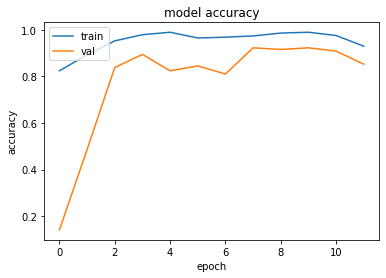

In [136]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit_9.history['accuracy'])
plt.plot(fit_9.history['val_accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

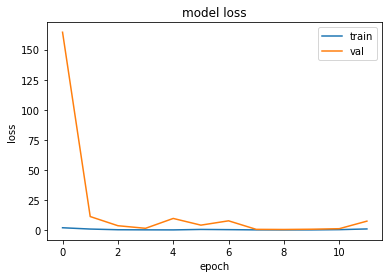

In [143]:
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit_9.history['loss'])
plt.plot(fit_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper right')
plt.show()

In [170]:
def create_model():
    model_4 = keras.models.Sequential()
    #keras.layers.BatchNormalization()
    model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))
    #keras.layers.BatchNormalization()
    model_4.add(keras.layers.AveragePooling2D(2,2))
    #model_4.add(keras.layers.Dropout(0.2))
    
    model_4.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
    #keras.layers.BatchNormalization()
    model_4.add(keras.layers.AveragePooling2D(2,2))
    
    model_4.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
    #keras.layers.BatchNormalization()
    model_4.add(keras.layers.AveragePooling2D(2,2))
    model_4.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
    #keras.layers.BatchNormalization()
    model_4.add(keras.layers.AveragePooling2D(2,2))
    model_4.add(keras.layers.Flatten())
    model_4.add(keras.layers.Dense(128,activation = 'relu'))
    model_4.add(keras.layers.Dense(64,activation = 'relu'))
    model_4.add(keras.layers.Dense(32,activation = 'relu'))
    model_4.add(keras.layers.Dense(3,activation = 'softmax'))
    # compile model
    model_4.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])
    return model_4

In [177]:
model_7 = keras.models.Sequential()
    #keras.layers.BatchNormalization()
model_7.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))
    #keras.layers.BatchNormalization()
model_7.add(keras.layers.AveragePooling2D(2,2))
    #model_4.add(keras.layers.Dropout(0.2))
    
model_7.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
    #keras.layers.BatchNormalization()
model_7.add(keras.layers.AveragePooling2D(2,2))
    
model_7.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
    #keras.layers.BatchNormalization()
model_7.add(keras.layers.AveragePooling2D(2,2))
model_7.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
    #keras.layers.BatchNormalization()
model_7.add(keras.layers.AveragePooling2D(2,2))
model_7.add(keras.layers.Flatten())
model_7.add(keras.layers.Dense(128,activation = 'relu'))
model_7.add(keras.layers.Dense(64,activation = 'relu'))
model_7.add(keras.layers.Dense(32,activation = 'relu'))
model_7.add(keras.layers.Dense(3,activation = 'softmax'))
model_7.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
average_pooling2d_67 (Averag (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 125, 125, 64)      18496     
_________________________________________________________________
average_pooling2d_68 (Averag (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 60, 60, 128)       73856     
_________________________________________________________________
average_pooling2d_69 (Averag (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 28, 28, 128)     

In [107]:
"""
def create_model():
    model_4 = keras.models.Sequential()
    model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))
    model_4.add(keras.layers.AveragePooling2D(2,2))
    model_4.add(keras.layers.Dropout(0.2))
    model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))
    model_4.add(keras.layers.AveragePooling2D(2,2))
    model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))
    model_4.add(keras.layers.AveragePooling2D(2,2))
    model_4.add(keras.layers.Flatten())
    model_4.add(keras.layers.Dense(64,activation = 'relu'))
    model_4.add(keras.layers.Dense(64,activation = 'relu'))
    model_4.add(keras.layers.Dense(32,activation = 'relu'))
    model_4.add(keras.layers.Dense(3,activation = 'softmax'))
    # compile model
    model_4.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])
    return model_4
"""

"\ndef create_model():\n    model_4 = keras.models.Sequential()\n    model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))\n    model_4.add(keras.layers.AveragePooling2D(2,2))\n    model_4.add(keras.layers.Dropout(0.2))\n    model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))\n    model_4.add(keras.layers.AveragePooling2D(2,2))\n    model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))\n    model_4.add(keras.layers.AveragePooling2D(2,2))\n    model_4.add(keras.layers.Flatten())\n    model_4.add(keras.layers.Dense(64,activation = 'relu'))\n    model_4.add(keras.layers.Dense(64,activation = 'relu'))\n    model_4.add(keras.layers.Dense(32,activation = 'relu'))\n    model_4.add(keras.layers.Dense(3,activation = 'softmax'))\n    # compile model\n    model_4.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])\n    return model_4\n"

In [116]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

In [90]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K

In [178]:
def create_mod(input_shape = (256,256,3)):
    
    
    X_input = Input(input_shape)
    input_data = keras.layers.Conv2D(32,(3,3),activation = 'relu')(X_input)
    input_data = keras.layers.BatchNormalization()(input_data)
    
    input_data = keras.layers.Conv2D(64,(3,3),activation = 'relu')(input_data)
    input_data = keras.layers.BatchNormalization()(input_data)

    #input_data = convolutional(input_data, (3, 3, 32,  64), downsample=True)

    for i in range(1):
        input_data = residual_block(input_data,  64,  32, 64)

    #input_data = convolutional(input_data, (3, 3,  64, 128), downsample=True)
    input_data = keras.layers.Conv2D(128,(3,3),activation = 'relu')(input_data)
    input_data = keras.layers.BatchNormalization()(input_data)

    for i in range(2):
        input_data = residual_block(input_data, 128,  64, 128)

    #input_data = convolutional(input_data, (3, 3, 128, 256), downsample=True)
    input_data = keras.layers.Conv2D(256,(3,3),activation = 'relu')(input_data)
    input_data = keras.layers.BatchNormalization()(input_data)

    for i in range(8):
        input_data = residual_block(input_data, 256, 128, 256)

    #route_1 = input_data
    #input_data = convolutional(input_data, (3, 3, 256, 512), downsample=True)
    input_data = keras.layers.Conv2D(512,(3,3),activation = 'relu')(input_data)
    input_data = keras.layers.BatchNormalization()(input_data)

    #for i in range(8):
        #input_data = residual_block(input_data, 512, 256, 512)

    #route_2 = input_data
    #input_data = convolutional(input_data, (3, 3, 512, 1024), downsample=True)

    #for i in range(4):
    #    input_data = residual_block(input_data, 1024, 512, 1024)
    input_data = keras.layers.Flatten()(input_data)
    input_data = keras.layers.Dense(512,activation = 'relu')(input_data)
    input_data = keras.layers.Dense(128,activation = 'relu')(input_data)
    input_data = keras.layers.Dense(64,activation = 'relu')(input_data)
    input_data = keras.layers.Dense(32,activation = 'relu')(input_data)
    
    input_dat = keras.layers.Dense(3,activation = 'softmax')(input_data)
    
    model = Model(inputs = input_data, outputs = input_dat, name='Resne')

    
    return model


In [179]:
model_5 = create_mod()

ResourceExhaustedError: OOM when allocating tensor with shape[30984192,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [141]:
"""
model_4 = keras.models.Sequential()

model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))
model_4.add(keras.layers.AveragePooling2D(2,2))

#model_4.add(keras.layers.Dropout(0.2))
model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D(2,2))

model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D(2,2))

model_4.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D(2,2))

model_4.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))

model_4.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))

model_4.add(keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'))
#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))

model_4.add(keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'))
#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))

model_4.add(keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'))
#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))

model_4.add(keras.layers.Flatten())

model_4.add(keras.layers.Dense(256,activation = 'relu'))
model_4.add(keras.layers.Dense(128,activation = 'relu'))
model_4.add(keras.layers.Dense(64,activation = 'relu'))
model_4.add(keras.layers.Dense(32,activation = 'relu'))
model_4.add(keras.layers.Dense(3,activation = 'softmax'))
model_4.summary()
"""

"\nmodel_4 = keras.models.Sequential()\n\nmodel_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))\nmodel_4.add(keras.layers.AveragePooling2D(2,2))\n\n#model_4.add(keras.layers.Dropout(0.2))\nmodel_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))\nmodel_4.add(keras.layers.AveragePooling2D(2,2))\n\nmodel_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))\nmodel_4.add(keras.layers.AveragePooling2D(2,2))\n\nmodel_4.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))\nmodel_4.add(keras.layers.AveragePooling2D(2,2))\n\nmodel_4.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))\n#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))\n\nmodel_4.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))\n#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))\n\nmodel_4.add(keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'))\n#model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))\n\nmodel_4.add(ker

In [42]:
model_4.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

AttributeError: 'KerasClassifier' object has no attribute 'compile'

In [171]:
es = EarlyStopping(monitor='val_accuracy', patience=4, verbose=1)

In [172]:
# grid search
#from sklearn.model_selection import GridSearchCV
#b_size = [10,20,40,60,80,100]
#epochss = [10,25,50,75,100]
#param_gridd = dict(batch_size = b_size, epochs = epochss)
#grid = GridSearchCV(estimator = model, param_grid = param_gridd, scoring = 'accuracy',n_jobs= -1, cv =10)
#grid_result = grid.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
#print("Best Parameters:", best_parameters)

In [173]:
with tf.device('/device:GPU:0'):
    fit_4=model.fit(np.array(X_train),np.array(y_train),epochs=50,verbose=1,batch_size = 10,validation_data=(np.array(X_test), np.array(y_test)), callbacks=[es])

Epoch 1/50
57/57 [==============================] - 19s 300ms/step - loss: 0.2536 - accuracy: 0.9859 - val_loss: 0.8630 - val_accuracy: 0.9718
Epoch 2/50
57/57 [==============================] - 13s 227ms/step - loss: 0.4725 - accuracy: 0.9842 - val_loss: 0.5969 - val_accuracy: 0.9789
Epoch 3/50
57/57 [==============================] - 13s 230ms/step - loss: 0.2333 - accuracy: 0.9842 - val_loss: 1.0029 - val_accuracy: 0.9648
Epoch 4/50
57/57 [==============================] - 13s 228ms/step - loss: 0.0643 - accuracy: 0.9947 - val_loss: 1.6477 - val_accuracy: 0.9648
Epoch 5/50
57/57 [==============================] - 11s 186ms/step - loss: 0.3699 - accuracy: 0.9912 - val_loss: 2.9666 - val_accuracy: 0.9437
Epoch 6/50
57/57 [==============================] - 4s 66ms/step - loss: 0.0656 - accuracy: 0.9965 - val_loss: 2.5249 - val_accuracy: 0.9648
Epoch 00006: early stopping


In [174]:
y_pred=model.predict(np.array(X_test))

In [175]:
yy = np.argmax(y_pred, axis=1)
yt = np.argmax(y_test, axis=1)

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(yt, yy)

0.9647887323943662

In [104]:
# grid search
###from sklearn.model_selection import GridSearchCV
#b_size = [10,20,40,60,80,100]
#epochss = [10,25,50,75,100]
#param_gridd = dict(batch_size = b_size, epochs = epochss)
#grid = GridSearchCV(estimator = model_4, param_grid = param_gridd, scoring = 'accuracy',n_jobs= -1, cv =10)
#grid_result = grid.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
#print("Best Parameters:", best_parameters)

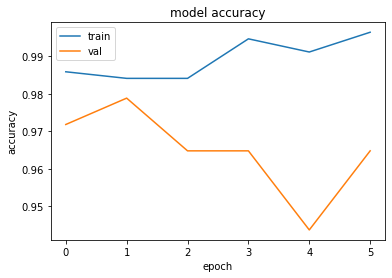

In [183]:
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit_4.history['accuracy'])
plt.plot(fit_4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

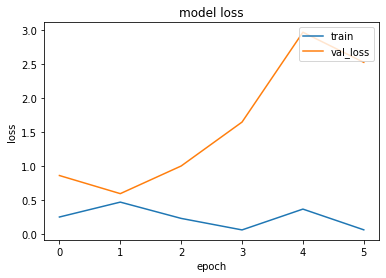

In [184]:
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(fit_4.history['loss'])
plt.plot(fit_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'], loc='upper right')
plt.show()

In [88]:
len(X_train) + len(X_test)

709

model 5

In [65]:
def residual_block(input_layer, input_channel, filter_num1, filter_num2):
    short_cut = input_layer
    conv = convolutional(input_layer, filters_shape=(1, 1, input_channel, filter_num1))
    conv = convolutional(conv       , filters_shape=(3, 3, filter_num1,   filter_num2))

    residual_output = short_cut + conv
    return residual_output

In [99]:
def convolutional(input_layer, filters_shape, downsample=False, activate=True, bn=True):
    if downsample:
        input_layer = ZeroPadding2D(((1, 0), (1, 0)))(input_layer)
        padding = 'valid'
        strides = 2
    else:
        strides = 1
        padding = 'same'

    conv = Conv2D(filters=filters_shape[-1], kernel_size = filters_shape[0], strides=strides,
                  padding=padding, use_bias=not bn)(input_layer)
    if bn:
        conv = BatchNormalization()(conv)
    if activate == True:
        conv = tf.keras.layers.LeakyReLU(alpha=0.1)(conv)

    return conv

In [34]:
model_4 = keras.models.Sequential()
model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (256,256,3)))
model_4.add(keras.layers.AveragePooling2D(2,2))
#model_4.add(keras.layers.Dropout(0.2))
model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D(2,2))
model_4.add(keras.layers.Conv2D(32,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D(2,2))
model_4.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D(2,2))
model_4.add(keras.layers.Conv2D(64,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))
model_4.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))
model_4.add(keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))
model_4.add(keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))
model_4.add(keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'))
model_4.add(keras.layers.AveragePooling2D((2,2),padding='same'))
model_4.add(keras.layers.Flatten())
model_4.add(keras.layers.Dense(256,activation = 'relu'))
model_4.add(keras.layers.Dense(128,activation = 'relu'))
model_4.add(keras.layers.Dense(64,activation = 'relu'))
model_4.add(keras.layers.Dense(32,activation = 'relu'))
model_4.add(keras.layers.Dense(3,activation = 'softmax'))